# Определение перспективного тарифа для телеком-компании

 Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

Шаг 1. Обработка файлов с данными и изучение общей информации

Шаг 2. Подготовка данных
- Изменение данных к нужным типам;
- Исправление ошибок в данных;

Считаем для каждого пользователя:
- Количество сделанных звонков и израсходованных минут разговора по месяцам;
- Количество отправленных сообщений по месяцам;
- Объем израсходованного интернет-трафика по месяцам;
- Помесячную выручку с каждого пользователя; 

Шаг 3. Анализ данные
- Описание поведения клиентов оператора, исходя из выборки;
- Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц?
- Считаем среднее количество, дисперсию и стандартное отклонение. Построение гистограммы.

Шаг 4. Проверка гипотез
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Шаг 5. Вывод


## Шаг 1. Откройте файл с данными и изучите общую информацию

In [1]:
import pandas as pd
import math
import numpy as np
df = pd.read_csv('/datasets/calls.csv')
df.tail(20)

,id,call_date,duration,user_id
202587,1499_200,2018-10-04,7.89,1499
202588,1499_201,2018-12-15,18.90,1499
202589,1499_202,2018-10-03,8.92,1499
202590,1499_203,2018-12-03,0.00,1499
202591,1499_204,2018-12-12,1.60,1499
202592,1499_205,2018-10-13,0.00,1499
202593,1499_206,2018-12-26,0.00,1499
202594,1499_207,2018-10-28,0.00,1499
202595,1499_208,2018-11-03,14.29,1499
202596,1499_209,2018-12-16,0.00,1499


In [2]:
df.describe()

,duration,user_id
count,202607.000000,202607.000000
mean,6.755887,1253.940619
std,5.843365,144.722751
min,0.000000,1000.000000
25%,1.300000,1126.000000
50%,6.000000,1260.000000
75%,10.700000,1379.000000
max,38.000000,1499.000000


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


In [4]:
df1 = pd.read_csv('/datasets/internet.csv', index_col=0)
df1.tail(10)

,id,mb_used,session_date,user_id
149386,1499_147,0.00,2018-10-21,1499
149387,1499_148,268.19,2018-11-13,1499
149388,1499_149,778.68,2018-11-24,1499
149389,1499_150,273.98,2018-11-20,1499
149390,1499_151,752.72,2018-10-11,1499
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499
149395,1499_156,544.37,2018-10-26,1499


In [5]:
df1.describe()

,mb_used,user_id
count,149396.000000,149396.000000
mean,370.192426,1252.099842
std,278.300951,144.050823
min,0.000000,1000.000000
25%,138.187500,1130.000000
50%,348.015000,1251.000000
75%,559.552500,1380.000000
max,1724.830000,1499.000000


In [6]:
df2 = pd.read_csv('/datasets/messages.csv')
df2.tail(10)

,id,message_date,user_id
123026,1499_174,2018-12-14,1499
123027,1499_175,2018-10-09,1499
123028,1499_176,2018-12-17,1499
123029,1499_177,2018-12-30,1499
123030,1499_178,2018-10-25,1499
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499
123035,1499_183,2018-11-16,1499


In [7]:
df2.describe()

,user_id
count,123036.000000
mean,1256.989410
std,143.523967
min,1000.000000
25%,1134.000000
50%,1271.000000
75%,1381.000000
max,1499.000000


In [8]:
df3 = pd.read_csv('/datasets/tariffs.csv')
df3.tail(10)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [9]:
df3.describe()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
mean,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
std,671.751442,10861.160159,1767.766953,989.949494,35.355339,1.414214,1.414214
min,50.000000,15360.000000,500.000000,550.000000,150.000000,1.000000,1.000000
25%,287.500000,19200.000000,1125.000000,900.000000,162.500000,1.500000,1.500000
50%,525.000000,23040.000000,1750.000000,1250.000000,175.000000,2.000000,2.000000
75%,762.500000,26880.000000,2375.000000,1600.000000,187.500000,2.500000,2.500000
max,1000.000000,30720.000000,3000.000000,1950.000000,200.000000,3.000000,3.000000


In [10]:
df4 = pd.read_csv('/datasets/users.csv')
df4.tail(10)

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
490,1490,30,NaN,Москва,Радомир,Алесин,2018-04-03,smart
491,1491,56,NaN,Челябинск,Радислав,Андрейкин,2018-04-25,ultra
492,1492,63,NaN,Санкт-Петербург,Руслана,Артёменко,2018-06-26,smart
493,1493,71,NaN,Красноярск,Таисия,Ахматулина,2018-11-24,ultra
494,1494,62,NaN,Омск,Ренат,Андропов,2018-08-17,smart
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart
499,1499,35,NaN,Пермь,Гектор,Корнилов,2018-09-27,smart


In [11]:
df4.describe()

,user_id,age
count,500.000000,500.00000
mean,1249.500000,46.58800
std,144.481833,16.66763
min,1000.000000,18.00000
25%,1124.750000,32.00000
50%,1249.500000,46.00000
75%,1374.250000,62.00000
max,1499.000000,75.00000


In [12]:
df.isna().sum()

id           0
call_date    0
duration     0
user_id      0
dtype: int64

In [13]:
df1.isna().sum()

id              0
mb_used         0
session_date    0
user_id         0
dtype: int64

In [14]:
df2.isna().sum()

id              0
message_date    0
user_id         0
dtype: int64

In [15]:
df3.isna().sum()

messages_included        0
mb_per_month_included    0
minutes_included         0
rub_monthly_fee          0
rub_per_gb               0
rub_per_message          0
rub_per_minute           0
tariff_name              0
dtype: int64

In [16]:
df4.isna().sum()

user_id         0
age             0
churn_date    462
city            0
first_name      0
last_name       0
reg_date        0
tariff          0
dtype: int64

## Шаг 2. Подготовьте данные

In [17]:
df['call_date'] = pd.to_datetime(df['call_date'], format = '%Y-%m-%d')
df['duration'] = np.ceil(df['duration']).astype(int)
 

In [18]:
df.tail(20) 

,id,call_date,duration,user_id
202587,1499_200,2018-10-04,8,1499
202588,1499_201,2018-12-15,19,1499
202589,1499_202,2018-10-03,9,1499
202590,1499_203,2018-12-03,0,1499
202591,1499_204,2018-12-12,2,1499
202592,1499_205,2018-10-13,0,1499
202593,1499_206,2018-12-26,0,1499
202594,1499_207,2018-10-28,0,1499
202595,1499_208,2018-11-03,15,1499
202596,1499_209,2018-12-16,0,1499


Полцчаем звонки с округленными минутами, как их считает оператор.

In [19]:
df1

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [20]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


In [21]:
df1['session_date'] = pd.to_datetime(df1['session_date'], format = '%Y-%m-%d')

In [22]:
df1

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000
...,...,...,...,...
149391,1499_152,318.90,2018-10-03,1499
149392,1499_153,490.13,2018-12-14,1499
149393,1499_154,0.00,2018-10-27,1499
149394,1499_155,1246.32,2018-11-26,1499


In [23]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null datetime64[ns]
user_id         149396 non-null int64
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 5.7+ MB


Удалили лишний столбец с индексами, и привели время к нужному типу.

In [24]:
df2

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000
...,...,...,...
123031,1499_179,2018-12-12,1499
123032,1499_180,2018-09-28,1499
123033,1499_181,2018-09-27,1499
123034,1499_182,2018-11-15,1499


In [25]:
df2['message_date'] = pd.to_datetime(df2['message_date'], format = '%Y-%m-%d')

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null datetime64[ns]
user_id         123036 non-null int64
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 2.8+ MB


In [27]:
df3

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


In [28]:
df4

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
...,...,...,...,...,...,...,...,...
495,1495,65,NaN,Иркутск,Авксентий,Фокин,2018-08-28,ultra
496,1496,36,NaN,Вологда,Трифон,Блохин,2018-01-27,smart
497,1497,32,NaN,Челябинск,Каролина,Агеева,2018-10-09,smart
498,1498,68,2018-10-25,Владикавказ,Всеволод,Акимчин,2018-07-19,smart


In [29]:
df4['reg_date'] = pd.to_datetime(df4['reg_date'], format = '%Y-%m-%d')

In [30]:
df4['churn_date'] = pd.to_datetime(df4['churn_date'], format = '%Y-%m-%d')

In [31]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null datetime64[ns]
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null datetime64[ns]
tariff        500 non-null object
dtypes: datetime64[ns](2), int64(2), object(4)
memory usage: 31.4+ KB


### Посчитайте для каждого пользователя:

In [32]:
df['month'] = pd.DatetimeIndex(df['call_date']).month

In [33]:
df

,id,call_date,duration,user_id,month
0,1000_0,2018-07-25,0,1000,7
1,1000_1,2018-08-17,0,1000,8
2,1000_2,2018-06-11,3,1000,6
3,1000_3,2018-09-21,14,1000,9
4,1000_4,2018-12-15,6,1000,12
...,...,...,...,...,...
202602,1499_215,2018-12-26,1,1499,12
202603,1499_216,2018-10-18,19,1499,10
202604,1499_217,2018-11-10,11,1499,11
202605,1499_218,2018-10-06,5,1499,10


In [34]:
df.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'count')

duration
user_id month          
1000    5            22
        6            43
        7            47
        8            52
        9            58
...                 ...
1498    10           41
1499    9             9
        10           68
        11           74
        12           69

[3174 rows x 1 columns]

Количество звонков каждым пользователем по месяцам.

In [35]:
call = df.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = 'sum')

call.fillna(0)
call

duration
user_id month          
1000    5           159
        6           172
        7           340
        8           408
        9           466
...                 ...
1498    10          247
1499    9            70
        10          449
        11          612
        12          492

[3174 rows x 1 columns]

Количество минут каждым пользователем по месяцам.

In [36]:
df2['month'] = pd.DatetimeIndex(df2['message_date']).month

In [37]:
sms = df2.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
sms.columns = ['count_sms']

Таблица количества сообщений отправленных каждым пользователем по месяцам.

In [38]:
df1['month'] = pd.DatetimeIndex(df1['session_date']).month

In [39]:
internet = df1.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
internet['gb'] = internet['mb_used'] / 1024
internet['gb'] = internet['gb'].apply(np.ceil).astype(int)
internet

mb_used  gb
user_id month              
1000    5       2253.49   3
        6      23233.77  23
        7      14003.64  14
        8      14055.93  14
        9      14568.91  15
...                 ...  ..
1498    10     20579.36  21
1499    9       1845.75   2
        10     17788.51  18
        11     17963.31  18
        12     13055.58  13

[3203 rows x 2 columns]

Таблица объем израсходованного интернет-трафика по месяцам для каждого пользователя.

In [40]:
call_sms = call.merge(sms, on = ['user_id','month'], how = 'outer' )
call_sms_internet =  call_sms.merge(internet['gb'], on = ['user_id','month'], how = 'outer' )

call_sms_internet = call_sms_internet.merge(df4, on = 'user_id', how = 'outer' )
call_sms_internet = call_sms_internet.fillna(0)
call_sms_internet.tail(30)

,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff
3186,1106,0.0,30.0,20.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3187,1106,0.0,24.0,22.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3188,1106,0.0,25.0,19.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3189,1106,0.0,23.0,22.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3190,1106,0.0,33.0,14.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3191,1106,0.0,29.0,21.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3192,1106,0.0,24.0,19.0,67,0,Калуга,Исаак,Костин,2018-04-26,ultra
3193,1231,0.0,55.0,11.0,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
3194,1231,0.0,201.0,28.0,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra
3195,1231,0.0,211.0,28.0,63,0,Чебоксары,Касьян,Авдюков,2018-05-23,ultra


In [41]:
def df_tariff(row):
    tariff = row['tariff']
    call = row['duration']
    
    
    if tariff == 'ultra':
        if call > 3000:
            return call - 3000
        return 0
    if tariff == 'smart':
        if call > 500 :
            return (call - 500)*3
        return 0

call_sms_internet['pay_call'] = call_sms_internet.apply(df_tariff, axis =1)
call_sms_internet

,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0


In [42]:
call_sms_internet['pay_call'].sum()


278217.0

In [43]:
def df_tariff1(row):
    tariff = row['tariff']
    sms = row['count_sms']
    
    
    if tariff == 'ultra':
        if sms > 1000:
            return sms - 1000
        return 0
    if tariff == 'smart':
        if sms > 50 :
            return (sms - 50)*3
        return 0

call_sms_internet['pay_sms'] = call_sms_internet.apply(df_tariff1, axis =1)
call_sms_internet


,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call,pay_sms
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0


In [44]:
call_sms_internet['pay_sms'].sum()

38784.0

In [45]:
def df_tariff2(row):
    tariff = row['tariff']
    internet = row['gb']
    
    
    if tariff == 'ultra':
        if internet > 30:
            return (internet - 30)*150
        return 0
    if tariff == 'smart':
        if internet > 15 :
            return (internet - 15)*200
        return 0

call_sms_internet['pay_gb'] = call_sms_internet.apply(df_tariff2, axis =1)
call_sms_internet

,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call,pay_sms,pay_gb
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,1000.0
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,600.0
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,400.0
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0


In [46]:
call_sms_internet['pay_gb'].sum()

1450750.0

In [47]:
call_sms_internet['pay_all'] = call_sms_internet['pay_call'] + call_sms_internet['pay_sms'] + call_sms_internet['pay_gb']
call_sms_internet

,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call,pay_sms,pay_gb,pay_all
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,1000.0,1000.0
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,600.0,600.0
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,400.0,400.0
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0,0.0


In [48]:
call_sms_internet['pay_all'].sum()

1767751.0

Сумма переплат, без учет платы за тариф.

In [49]:
def df_tariff3(row):
    tariff = row['tariff']
    
    
    
    if tariff == 'ultra':
        return  1950
        
    if tariff == 'smart':
        return  550

call_sms_internet['pay_tariff'] = call_sms_internet.apply(df_tariff3, axis = 1)
call_sms_internet



,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call,pay_sms,pay_gb,pay_all,pay_tariff
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0,1950
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0,1950
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0,1950
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0,1950
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,0.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,1000.0,1000.0,550
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,600.0,600.0,550
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,400.0,400.0,550
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0,0.0,1950


In [50]:
call_sms_internet['pay_all'] = call_sms_internet['pay_all'] + call_sms_internet['pay_tariff']

In [51]:
call_sms_internet

,user_id,duration,count_sms,gb,age,churn_date,city,first_name,last_name,reg_date,tariff,pay_call,pay_sms,pay_gb,pay_all,pay_tariff
0,1000,159.0,22.0,3.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,1950.0,1950
1,1000,172.0,60.0,23.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,1950.0,1950
2,1000,340.0,75.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,1950.0,1950
3,1000,408.0,81.0,14.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,1950.0,1950
4,1000,466.0,57.0,15.0,52,0,Краснодар,Рафаил,Верещагин,2018-05-25,ultra,0.0,0.0,0.0,1950.0,1950
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3211,1489,0.0,21.0,20.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,1000.0,1550.0,550
3212,1489,0.0,20.0,18.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,600.0,1150.0,550
3213,1489,0.0,35.0,17.0,35,0,Санкт-Петербург,Павел,Гончаров,2018-08-15,smart,0.0,0.0,400.0,950.0,550
3214,1128,0.0,0.0,0.0,51,2018-12-23 00:00:00,Волжский,Ксения,Агаева,2018-12-15,ultra,0.0,0.0,0.0,1950.0,1950


## Шаг 3. Проанализируйте данные
Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [52]:
call_sms_internet_smart = call_sms_internet.query('tariff == "smart"')
call_sms_internet_smart['pay_all'].sum()
#df4['tariff'].value_counts()

2875901.0

In [53]:
call_sms_internet_smart.pivot_table(index = 'tariff', values=['duration','count_sms','gb',], aggfunc = ['mean', 'median'])

mean                           median               
        count_sms    duration         gb count_sms duration    gb
tariff                                                           
smart   33.369058  417.747534  16.321525      28.0    421.5  17.0

In [54]:
call_sms_internet_ultra = call_sms_internet.query('tariff == "ultra"')
call_sms_internet_ultra['pay_all'].sum()

2041050.0

In [55]:
call_sms_internet.pivot_table(index = 'tariff', values=['duration','count_sms','gb','pay_all'], aggfunc = ['mean', 'var', 'std'])

mean                                              var  \
        count_sms    duration         gb      pay_all    count_sms   
tariff                                                               
smart   33.369058  417.747534  16.321525  1289.641704   796.955256   
ultra   49.313387  526.089249  19.474645  2070.030426  2285.417425   

                                                       std              \
             duration         gb        pay_all  count_sms    duration   
tariff                                                                   
smart    36281.393836  33.133453  669730.763895  28.230396  190.476754   
ultra   101052.493549  97.378544  141387.714809  47.806040  317.887549   

                              
              gb     pay_all  
tariff                        
smart   5.756167  818.370799  
ultra   9.868057  376.015578

In [56]:
!pip install -U seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 1.2 MB/s eta 0:00:01


In [57]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set(style="darkgrid")
sns

<module 'seaborn' from '/home/jovyan/.local/lib/python3.7/site-packages/seaborn/__init__.py'>

In [58]:

# sns.histplot(data=call_sms_internet_smart, x="duration",kde=True)
# plt.title('duration')
# plt.show() 
# # НЕСРАБОТАЛО

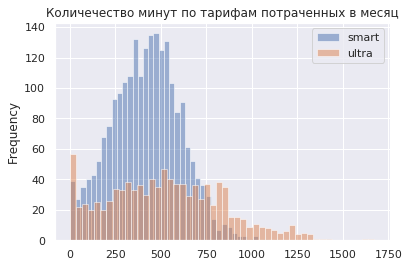

In [59]:
call_sms_internet.groupby('tariff')['duration'].plot(kind = 'hist', bins = 50, alpha = 0.5, legend = True)
plt.title('Количечество минут по тарифам потраченных в месяц')
plt.show()

Многие пользователи тарифа ultra вообще не пользовались звонками в некоторые месяца. В среднем по тарифу smart разговаривают 500 мин, ultra выбирают кто говорит много. Больше 1300-1400 мин в месяц никто не наговаривает.

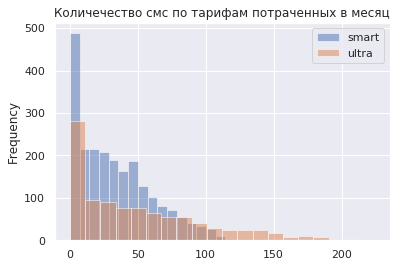

In [60]:
call_sms_internet.groupby('tariff')['count_sms'].plot(kind = 'hist', bins = 20, alpha = 0.5, legend = True)
plt.title('Количечество смс по тарифам потраченных в месяц')
plt.show()

Многие пользователи не пользуются смс месяцами. Наверное используют мессенджеры или они просто любят поговорить.

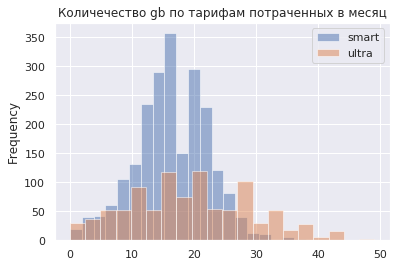

In [61]:
call_sms_internet.groupby('tariff')['gb'].plot(kind = 'hist', bins = 20, alpha = 0.5, legend = True)
plt.title('Количечество gb по тарифам потраченных в месяц')
plt.show()

По тарифу smart очень много пользователей переходят лимит пользования интернета 15gb, что приносит достаточно большую прибыль.

## Шаг 4. Проверьте гипотезы


In [62]:
call_sms_internet.query('city == "Москва"')['pay_all'].var()

565636.467011886

In [63]:
call_sms_internet.query('city != "Москва"')['pay_all'].var()

654069.5749627769

In [64]:
from scipy import stats as st

sample1= call_sms_internet_smart['pay_all']
sample2= call_sms_internet_ultra['pay_all']

print('H0:средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются')
print('H1:средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются ')

alpha = 0.05
results = st.ttest_ind(sample1, sample2, equal_var = False)

print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу H0')
else:
    print('Не получилось отвергнуть нулевую гипотезу H0') 

H0:средняя выручка пользователей тарифов «Ультра» и «Смарт» не различаются
H1:средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются 
p-значение: 1.927011394420941e-250
Отвергаем нулевую гипотезу H0


In [71]:
sample3= call_sms_internet.query('city == "Москва"')['pay_all']
sample4= call_sms_internet.query('city != "Москва"')['pay_all']

print('H0:средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов')
print('H1:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов')


alpha = 0.05
results1 = st.ttest_ind(sample3, sample4, equal_var = False)

print('p-значение:', results1.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Не получилось отвергнуть нулевую гипотезу') 

H0:средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов
H1:средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов
p-значение: 0.5216952110000279
Отвергаем нулевую гипотезу


Для проверки гипотез про выручку тарифов и выручки Москвы и других регионов, мы выбираем методом "О равенстве среднего двух генеральных совокупностей по взятым из них выборкам", так как выборки не зависимы. Параметр equal_var = False потому что дисперсии выборок не равны. Альфу берем стандартную равную 0.05 это обозначает критическую область с разных сторон в совокупности дающая 10%.

## Шаг 5.  Вывод


Мы изучили 2 тарифа smart n ultra. Смарт обычный тариф с небольшим лимитом звонков смс и интернета. Тариф ультра более дорогой и с большими лимитами.
Тариф ультра приносит больше средств компании чем смарт. Но не все пользователи тарифа ультра используют полноценно возможности тарифа. Чаще за лимиты тарифа выходят пользователи тарифа smart, а вот пользователи тарифа ultra не разу не выходили за лимиты звонков и лимиты смс.  По моему мнению, каждый тариф приносит денги в своей каттегории пользователей. 

In [66]:
call_sms_internet.pivot_table(index = 'tariff', values=['duration','count_sms','gb','pay_all'], aggfunc = 'mean')

,count_sms,duration,gb,pay_all
tariff,,,,
smart,33.369058,417.747534,16.321525,1289.641704
ultra,49.313387,526.089249,19.474645,2070.030426


In [67]:
df4['tariff'].value_counts()

smart    351
ultra    149
Name: tariff, dtype: int64

In [68]:
call_sms_internet.pivot_table(index = 'tariff', values=['pay_call','pay_sms','pay_gb','pay_all'], aggfunc = ['mean','sum'])

mean                                           sum            \
            pay_all    pay_call      pay_gb    pay_sms    pay_all  pay_call   
tariff                                                                        
smart   1289.641704  124.760987  597.488789  17.391928  2875901.0  278217.0   
ultra   2070.030426    0.000000  120.030426   0.000000  2041050.0       0.0   

                            
           pay_gb  pay_sms  
tariff                      
smart   1332400.0  38784.0  
ultra    118350.0      0.0

Мы проверили 2 гипотезы и получили:
- средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;
- средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

